In [ ]:
import os
import zipfile
import shutil
import cv2
import numpy as np

def downsample_kedf_dataset(uploaded_zip, output_base_dir, target_sizes,
                             emotions=['AF01', 'AF02', 'AF03', 'AF04', 'AF05', 'AF06', 'AF07', 'AF08', 'AF09', 'AF10', 'AF11', 'AF12', 'AF13', 'AF14', 'AF15', 'AF16', 'AF17', 'AF18', 'AF19', 'AF20',
                                       'AF21', 'AF22', 'AF23', 'AF24', 'AF25', 'AF26', 'AF27', 'AF28', 'AF29', 'AF30', 'AF31', 'AF32', 'AF33', 'AF34', 'AF35', 'AM01', 'AM02', 'AM03', 'AM04', 'AM05',
                                       'AM06', 'AM07', 'AM08', 'AM09', 'AM10', 'AM11', 'AM12', 'AM13', 'AM14', 'AM15', 'AM16', 'AM17', 'AM18', 'AM19', 'AM20', 'AM21', 'AM22', 'AM23', 'AM24', 'AM25',
                                       'AM26', 'AM27', 'AM28', 'AM29', 'AM30', 'AM31', 'AM32', 'AM33', 'AM34', 'AM35', 'BF01', 'BF02', 'BF03', 'BF04', 'BF05', 'BF06', 'BF07', 'BF08', 'BF09', 'BF10',
                                       'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16', 'BF17', 'BF18', 'BF19', 'BF20', 'BF21', 'BF22', 'BF23', 'BF24', 'BF25', 'BF26', 'BF27', 'BF28', 'BF29', 'BF30',
                                       'BF31', 'BF32', 'BF33', 'BF34', 'BF35', 'BM01', 'BM02', 'BM03', 'BM04', 'BM05', 'BM06', 'BM07', 'BM08', 'BM09', 'BM10', 'BM11', 'BM12', 'BM13', 'BM14', 'BM15',
                                       'BM16', 'BM17', 'BM18', 'BM19', 'BM20', 'BM21', 'BM22', 'BM23', 'BM24', 'BM25', 'BM26', 'BM27', 'BM28', 'BM29', 'BM30', 'BM31', 'BM32', 'BM33', 'BM34', 'BM35']):   # All the folder's name present in the KDEF dataset
    """
    Downsample the KEDF dataset uploaded to Colab with exact target sizes

    Args:
    - uploaded_zip (str): Path to the uploaded zip file
    - output_base_dir (str): Base directory to save downsampled datasets
    - target_sizes (list): List of exact pixel sizes to resize to
    - emotions (list): List of emotion folders to process
    """

    os.makedirs(output_base_dir, exist_ok=True)

    temp_extract_dir = os.path.join(output_base_dir, 'temp_KEDF_extract')
    os.makedirs(temp_extract_dir, exist_ok=True)

    with zipfile.ZipFile(uploaded_zip, 'r') as zip_ref:
        zip_ref.extractall(temp_extract_dir)

    # Find the correct directory containing images
    def find_image_dir(base_path):
        for root, dirs, files in os.walk(base_path):
            if any(emotion in dirs for emotion in emotions):
                return root
        return None

    # Find the KEDF directory
    kedf_dir = find_image_dir(temp_extract_dir)

    if not kedf_dir:
        print("Extracted contents:")
        for root, dirs, files in os.walk(temp_extract_dir):
            print(f"Root: {root}")
            print(f"Dirs: {dirs}")
            print(f"Files: {files}")

        raise ValueError("Could not find directory containing emotion folders in the uploaded zip")

    for target_size in target_sizes:
        downsample_output_dir = os.path.join(output_base_dir, f'KEDF_downsample_{target_size}')
        os.makedirs(downsample_output_dir, exist_ok=True)

        for emotion in emotions:
            emotion_input_dir = os.path.join(kedf_dir, emotion)
            emotion_output_dir = os.path.join(downsample_output_dir, emotion)
            os.makedirs(emotion_output_dir, exist_ok=True)

            for filename in os.listdir(emotion_input_dir):
                if filename.lower().endswith(('.jpg')):
                    input_path = os.path.join(emotion_input_dir, filename)
                    output_path = os.path.join(emotion_output_dir, filename)

                    img = cv2.imread(input_path)
                    downsampled_img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_NEAREST)     # Resize image to exact target size using INTER_NEAREST
                    cv2.imwrite(output_path, downsampled_img)

        for item in os.listdir(kedf_dir):
            src = os.path.join(kedf_dir, item)
            dst = os.path.join(downsample_output_dir, item)
            if os.path.isfile(src) and not os.path.exists(dst):
                shutil.copy2(src, dst)


    shutil.rmtree(temp_extract_dir) # Clean up temporary extraction directory

    print("Downsampling complete!")
    print(f"Downsampled datasets created in: {output_base_dir}")


downsample_kedf_dataset('/content/KDEF.zip', '/content/downsampled_datasets', [112, 56, 28])



Downsampling complete!
Downsampled datasets created in: /content/downsampled_datasets


In [ ]:
!zip -r /content/downsampled_datasets.zip /content/downsampled_datasets

Streaming output truncated to the last 5000 lines.
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02HAS.JPG (deflated 13%)
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02DIHR.JPG (deflated 13%)
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02HAHR.JPG (deflated 13%)
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02NES.JPG (deflated 13%)
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02SUFR.JPG (deflated 15%)
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02ANHL.JPG (deflated 14%)
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02SAFR.JPG (deflated 15%)
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02AFHL.JPG (deflated 14%)
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02NEFR.JPG (deflated 15%)
  adding: content/downsampled_datasets/KEDF_downsample_28/BF02/BF02HAHL.JPG (deflated 14%)
  adding: content/downsampled_datasets/KE

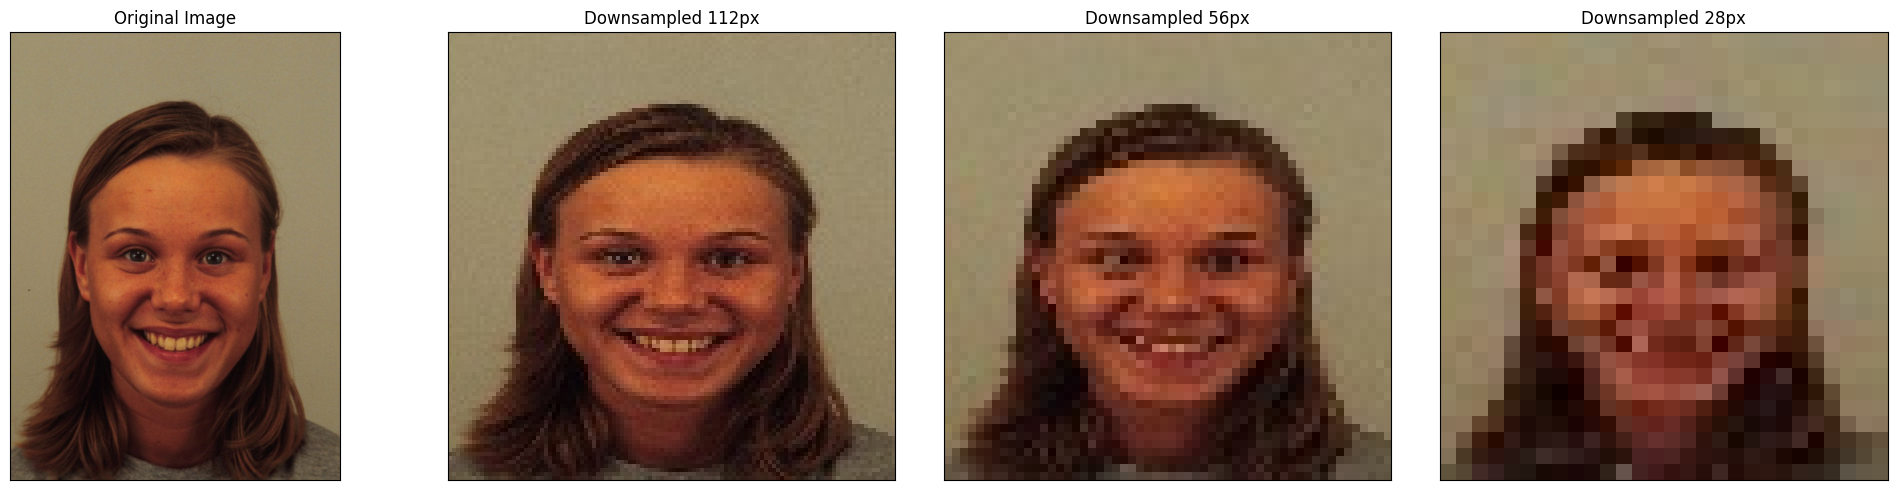

In [2]:
import matplotlib.pyplot as plt
import cv2

def display_four_images(image_paths):
    """
    Display 4 images side by side

    Args:
    - image_paths (list): List of 4 image file paths
    """

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    for i, path in enumerate(image_paths):
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axs[i].imshow(img_rgb)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title(path.split('/')[-1])
        axs[i].set_title(titles[i] if titles else path.split('/')[-1])
    plt.tight_layout()
    plt.show()

image_paths = [
    '/content/AF19HAS.JPG',
    '/content/AF19HAS112.JPG',
    '/content/AF19HAS56.JPG',
    '/content/AF19HAS28.JPG'
]


titles = [
    'Original Image',
    'Downsampled 112px',
    'Downsampled 56px',
    'Downsampled 28px'
]
display_four_images(image_paths)